# Occupancy in a Classroom

### Bradley Warner
### Feb 5, 2019

This project is based on a problem poised in the {538 blog ](http://fivethirtyeight.com/features/can-you-solve-the-puzzle-of-your-misanthropic-neighbors/).  Peter Norvig solved this problem using simulation and recursion in his [pytudes](https://github.com/norvig/pytudes). We have borrowed his format and much of his code and ideas. However, we have supplemented his work with several ideas. We have added a discussion of minimum and maximum occupancy, a more efficient recursion algorithm, probability calculations based on conditional arguments, and an analytic solution using generating functions. We feel these are significant additions. 

This problem is known as the urinal problem in the mathematical literature.

### Problem Statement
Consider this problem:
    
> *The Registrar at the United States Air Force Academy is interested in seating for finals. Suppose there is a row of some number, N, of seats in a classroom/lectinar. Cadets enter the room one at a time and selecting a seat at random from those that have nobody in them and nobody in the adjacent seats. To keep the problem simple, we will consider all rows of the lectinar as one long continuous row. Otherwise we would have to worry about seats at the end of each row and seats in front and behind. Students keep coming into the room until no acceptable seats remain. *


![N houses](classroom.jpg)

### Problem
What is the expected fraction of occupied seats as the room gets larger, that is, as N goes to infinity?

## Styles of Thinking

There are different ways to approach or understand this problem. We can use a purely mathematical approach, we can use a purely computational approach, or a hybrid that uses both. We will start our exploration with the hybrid approach.

- **Hybrid Approach**: In this approach we will simplify the problem. We will attempt to gain insights by enumerating solutions. We then hope that we can come up with a computational method such as curve fitting or recurssion. We will select specific values for the number of seats and hope that the combination or computation and mathematics will improve our knowledge of the problem. This method never proves a solution.
- **Computational Thinking**: In this method, we will use simulation to replicate the problem for a fixed number of seats. This can either confirm our hybric approach or provide additional insights.
- **Mathematical Style**: This style uses sophisticated mathematics (e.g. generating functions, differentiation, asymptotic analysis, and manipulation of summations). It develops a proof of the result. This is clearly challenging and not always possible.

In this specific puzzle, our steps will:
- Explore the problem by simplifying and enumerating possibilities for small values of `n`.
- Simulate the process and examine insights.
- Develop a recurive process and plot results and examine them for insight.
- Solve numerically for the value using curve fitting.
- Given that formula, mathematically justify the results.

This is mostly  computational thinking, with a little mathematical thrown in. 

## Explore: Simplify and Enumerate

At most, one out of two seats will be occupied; that is if the room only has two seats, then only one cadet can be in the room. The fraction of occupied seats,or *density*, is 1/*N* = 1/2.    

In the case of three seats, either one seat will be occupied, the middle one, or two will be occupied, the two edge seats. The average occupancy is 5/3 = 1/3+2/3+2/3 in this case. The density is (5/3)/3 = 5/9.

#### Consider *N* = 4 Seats
To make sure we understand the problem, let's try a simple example, with *N*=4 seats. We will represent the  originally empty row of four seats by four dots, this is Peter's notation:

     ....
     
Now the first cadet randomly chooses one of the four seats (which are all acceptable). We'll indicate an occupied seat by a `1`, so the four equiprobable choices are, note we are using a 0 based index to conform with python:

     Choice 0: 1...
     Choice 1: .1..
     Choice 2: ..1.
     Choice 3: ...1
     
When a seat is occupied, any adjacent seats become unacceptable. We'll indicate that with a `0`:

     Choice 0: 10..
     Choice 1: 010.
     Choice 2: .010
     Choice 3: ..01
     
In all four cases, a second cadet has a place to sit, but then there is no place for a third cadet. 
The occupancy is 2 in all cases, and thus the *expected occpancy* is 2. The occupancy fraction, or *density*, is 2/*N* = 2/4 = 1/2.  

#### Early Conjecture
Notice that the choice of a seat can either remove 2 or 3 available seats. Thus, an early conjecture is the average occupancy will be between 1/2 and 1/3.

### Minimum and Maximum

Let's bound the density by finding expression for the minimum numbers of cadets in the room where there are no available seats and the maximum number of cadets in the room where there are no available seats.

#### Case 1 N is even

When $N$ is even, to get the maximum we can start in either the first or second seat and then skip a seat. This gives the maximum number of occupied seats as we can't get the cadets any closer together. Thus we will get ${N \over 2}$ for the maximum number of occupied seats. Thus the maximum density is ${1 \over 2}$.  

For the minimum, we can start in the second seat or first seat. We then want the maximum spread which is three seats away. If we put a cadet in the first seat we can put a cadet in the fourth seat and the two seats inbetween are not available. We are essentailly counting by threes. We have two possibilities, $N$ is divisible by 3 or $N$ has remainder 2 when divided by 3. In the first case we have the number of occupied seats. In the second case we need to round up to the next nearest integer. This is called the ceiling function, defined as:

$$\lceil x \rceil = min\{n \in \mathrm{N} \vert n \geq x \}$$ 

Thus the minimum density is ${\lceil {N \over 3} \rceil \over N}$.  

Let's load some packages to help us visualize the results.

In [1]:
import numpy as np
#Allows the plot to render in the notebook
%matplotlib inline 
# Import mean
from statistics import mean
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

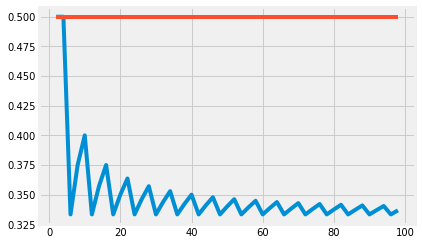

In [2]:
xs=np.arange(2,100,2)
xs
plt.plot(xs,np.ceil(xs/3)/xs)
plt.plot(xs,(xs/2)/xs);

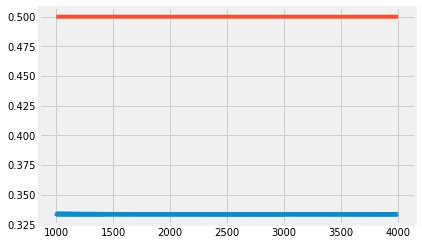

In [3]:
xs=np.arange(1000,4000,2)
xs
plt.plot(xs,np.ceil(xs/3)/xs)
plt.plot(xs,(xs/2)/xs);

#### Case 2 N is odd

For the maximum we want to start in the first seat and then go every other seat. This leads to a maximum number of occupied seats as ${N \over 2} + {1 \over 2}$ or $\lceil {N \over 2} \rceil$. The density is  ${\lceil {N \over 2} \rceil \over N}$. 

For the minimum, we will have the same desnity as the even case. ${\lceil {N \over 3} \rceil \over N}$.  

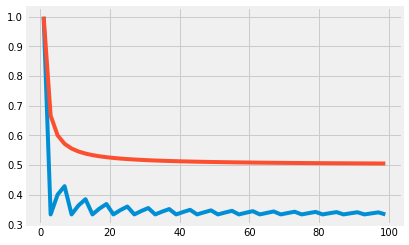

In [4]:
xs=np.arange(1,101,2)
xs
plt.plot(xs,np.ceil(xs/3)/xs)
plt.plot(xs,np.ceil(xs/2)/xs);

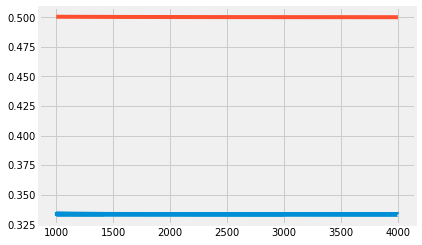

In [5]:
xs=np.arange(1001,4001,2)
xs
plt.plot(xs,np.ceil(xs/3)/xs)
plt.plot(xs,np.ceil(xs/2)/xs);

Let's write a function that determines the maximum and minimum for any number of seats.

In [6]:
def minmax(n):
    if n % 2:
        max=np.ceil(n/2)
        min=np.ceil(n/3)
    else:
        max=n/2
        min=np.ceil(n/3)
    return int(max),int(min)

In [7]:
minmax(160)

(80, 54)

#### Summary to this point  

We can view this problem as decomposing an integer into the sum of 2s and 3s. The number of occupied seats is the number of terms in the sum. We have to be careful because for $N$ odd, we could have a 1 at the end, think of the case of 3 seats.

We can potentially get any values between the maximum and minimum by replacing a 3 with a 2 and a 1 thus increases the number of occuppied seats.  

Our problem of finding the average occupancy, density, is just a weighted average of the minimum through maximum number of occuppied seats. In the limit, this value will be between 1/2 and 1/3.

### Continuing our exploration  

Let's look at 5 seats to see if we can gain some more insight into the problem. We want to start to determine the size of the weightings in the averaging process. 

#### Consider *N* = 5 Seats

With *N* = 5 seats, there are 5 equiprobable choices for the first cadet:

     Choice 0: 10...
     Choice 1: 010..
     Choice 2: .010.
     Choice 3: ..010
     Choice 4: ...01

Each seat has has the same probability of being selected at this point, 1/5, or in the general case ${1 \over N}$.  The number of available seats for the next cadet is the number of available seats.  This will depend on if 2 available seats were selected with the first student or 3 seats.

Suppose the first cadet selected seat 0, since there are 5 choices, this has probability 1/5. Now there are three choices for the next cadet. Suppose she selects seat 3. Now there are no more available seats. This ordering $[0,3]$ has probability 1/15.  

Suppose the order were reversed, that seat 3 was selected first and seat 0 second. This has probability 1/10. This problem is not symmetric and the weightings will depend on the order of the seats selected.

Let's list out the ordering of seat selections and their probabilities:

| Ordering | Probability | Occupied |  
| ------------|-----------|-----------|  
| [0,2,4] | 1/15 | 3 |  
| [0,3] | 1/15 | 2 | 
| [0,4,2] |  1/15 | 3 |  
| [1, 3] | 1/10 | 2 | 
| [1,4]|1/10 |2 | 
| [2,0,4] |1/10 |3 | 
| [2,4,0] | 1/10 |3 | 
|[3, 1] | 1/10 | 2|   
| [3,0] | 1/10 |2 | 
| [4,2,0] |1/15 | 3| 
|[4,0,2] |1/15 |3 | 
| [4,1] |1/15 | 2|   

The probability column adds to one as it should. The expected occupancy is the sum of the product of probability and number of occupied seats.

In [8]:
probs = np.repeat([1/15,1/10],[6,6])
occupied = np.repeat([3,2,3,2],[4,2,2,4])
print('The average number of occupied seats our of 5 is {:.4f}'.format(sum(probs*occupied)))
print('The density of occupied seats out of 5 is {:.4f}'.format(sum(probs*occupied)/5))

The average number of occupied seats our of 5 is 2.4667
The density of occupied seats out of 5 is 0.4933


Notice that of the twelve orderings, half have the minimum number of seats and half have the maximum. However, when 3 seats are taken four of the six cases have the lower probability of 1/15. For the orderings with 2 seats taken, four of them have the larger probability of 1/10. In the case of 5 seats, this was enough to lower the average number of occupied seats below 2.5.  

Will this hold?  

## Simulation


A simulation can help to verify our results to this point and then be used to generalize. It can also give insights on how to proceed. This is a purely computational approach to the problem.

The simulation will start with an empty set of occupied seats. We then go through the seats in random order, occupying just the ones that have no neighbor. (Note that `random.sample(range(n), n)` gives a random ordering of `range(n)`.)

We use Peter's code for the simulation and counting below.

In [9]:
# Import the needed package
import random

In [10]:
random.sample(range(10),10)

[7, 9, 3, 5, 4, 2, 0, 6, 8, 1]

In [1]:
# Peter's code
def simulate(n):
    "Simulate seating in seats, and return a sorted tuple of occupied seats."
    occupied = set()
    for seat in random.sample(range(n), n):
        if (seat - 1) not in occupied and (seat + 1) not in occupied:
            occupied.add(seat)
    return sorted(occupied)

In [12]:
simulate(10)

[1, 3, 5, 7, 9]

In [13]:
def simulated_density(n, repeat=10000):
    "Estimate density by simulation, repeated `repeat` times."
    return mean(len(simulate(n)) / n 
                for _ in range(repeat))

Let's simulate a couple of times with 5 seats to see the orderings we get.

In [14]:
simulate(5)

[0, 2, 4]

In [15]:
simulate(5)

[1, 4]

In [16]:
simulated_density(5)

0.49434

This is close, if we ran more repeats it should be closer.

In [17]:
simulated_density(5,1000000)

0.4932444

Now let's repeat simulate multiple times and keep track of the orderings. Since we ordered the seats in our code we will have to combine the orderings so
that order does not matter.  Thus we have [0,2,4], [0,3], [1,3], and [1,4] with probabilities 14/30, 5/30, 6/30, and 5/30.

In [18]:
[14/30, 5/30, 6/30, 5/30]

[0.4666666666666667, 0.16666666666666666, 0.2, 0.16666666666666666]

The expected number of occupied seats is:

In [19]:
3*14/30+2*16/30

2.466666666666667

In [20]:
from collections import Counter

Counter(tuple(simulate(5)) for _ in range(10000))

Counter({(0, 2, 4): 4675, (0, 3): 1654, (1, 3): 2046, (1, 4): 1625})

The results match.  About 46.7% of the time 3 seats are occupied and the remaining time 2 seats are occupied.

Let's run the simulation for different seat sizes and see the pattern.

In [21]:
print('   n   simulate')
for n in (10, 25, 50, 100, 200, 400, 800):
    print('{:4d}   {:.4f}'
          .format(n, simulated_density(n)))

   n   simulate
  10   0.4628
  25   0.4442
  50   0.4385
 100   0.4353
 200   0.4337
 400   0.4330
 800   0.4326


We are approaching 0.432 for the density via our simulation results.

## Recursion 

#### Consider *N* = 5 Seats

With *N* = 5 seats, there are 5 equiprobable choices for the first cadet:

     Choice 0: 10...
     Choice 1: 010..
     Choice 2: .010.
     Choice 3: ..010
     Choice 4: ...01

     
Now we'll add something new: the lengths of consecutive acceptable seats to the left and right of the chosen seat:

     Choice 0: 10... lengths = (0, 3)
     Choice 1: 010.. lengths = (0, 2)
     Choice 2: .010. lengths = (1, 1) 
     Choice 3: ..010 lengths = (2, 0) 
     Choice 4: ...01 lengths = (3, 0) 

#### Recursion 

From the example above, we see that after the first student is seated, we have two new smaller seating problems. We can use the idea of recursion to develop a function to help some this problem. The recursive formula will be a function of the available seats.

#### Defining `seated(n)`

This is Peter's idea and code for the first recursion.

We will define `seated(n)` to be the expected number of occupied seats in a row of `n` seats. So:

     Choice 0: 10... lengths = (0, 3); seated = seated(0) + 1 + seated(3)
     Choice 1: 010.. lenghts = (0, 2); seated = seated(0) + 1 + seated(2)
     Choice 2: .010. lengths = (1, 1); seated = seated(1) + 1 + seated(1)
     Choice 3: ..010 lengths = (2, 0); seated = seated(2) + 1 + seated(0)
     Choice 4: ...01 lengths = (3, 0); seated = seated(3) + 1 + seated(0)
        
So we can say that `seated(n)` is:

- 0 when `n` is 0 (because no seats means no cadets),
- 1 when `n` is 1 (because one isolated acceptable seat has one cadet),
- else the mean, over the `n` choices for the first occupied seat,
of the sum of that seat plus the occupancy lengths of the seats to the left and right.

We can implement that with a set of functions.

In [22]:
def lengths(n):
    """A list
    of tuples of the form [(L,R), ...] where the i-th tuple contains the lengths of acceptable seats to
    the left and right of sear i."""
    return [(max(0,i-1),max(0,n-i-2))
           for i in range(n)]

In [23]:
# Test code
lengths(5)

[(0, 3), (0, 2), (1, 1), (2, 0), (3, 0)]

In [24]:
def seated(n):
    "The expected occupancy for a row of n seats"
    return (0 if n == 0 else
            1 if n == 1 else
            mean(seated(L) + 1 + seated(R)
                 for (L, R) in lengths(n)))

In [25]:
seated(5)

2.466666666666667

Now define a function to find density.

In [26]:
def density(n): return seated(n) / n

Let's check that `seated(n)` is what we computed up to 5 and then for other small values, up to 7:

In [27]:
{n: seated(n) for n in range(10)}

{0: 0,
 1: 1,
 2: 1,
 3: 1.6666666666666667,
 4: 2,
 5: 2.466666666666667,
 6: 2.888888888888889,
 7: 3.323809523809524,
 8: 3.7555555555555555,
 9: 4.188007054673721}

That seems reasonable, although we have not proved the values above 4 are ccorrect.

#### Dynamic Programming Version of `seated`

Peter introduces this idea.  

Since this is a recursion problem, the computation of `seated(n)` makes multiple calls to `seated(n-1), seated(n-2),` etc. To avoid re-computing the same calls over and over, we will modify `seated` to save previous results using [dynamic programming](https://en.wikipedia.org/wiki/Dynamic_programming). We could implement that in one line with the decorator [`@functools.lru_cache`](https://docs.python.org/3/library/functools.html#functools.lru_cache), but then we would have to worry about the recursion limit. Instead we will explicitly manage a list, `cache`, such that `cache[n]` holds `seated(n)`:

In [28]:
def seated(n, cache=[0, 1]):
    "The expected occupancy for a row of n seats."
    print('cache',cache)
    # Store seated(i) in cache[i] for all as-yet-uncomputed values of i up to n:
    for i in range(len(cache), n+1):
        print('i',i,'cache',cache)
        cache.append(mean(cache[L] + 1 + cache[R]
                          for (L, R) in lengths(i)))
    return cache[n]

Let's see what this code is doing.

In [29]:
seated(5)

cache [0, 1]
i 2 cache [0, 1]
i 3 cache [0, 1, 1]
i 4 cache [0, 1, 1, 1.6666666666666667]
i 5 cache [0, 1, 1, 1.6666666666666667, 2]


2.466666666666667

In [30]:
seated(5)

cache [0, 1, 1, 1.6666666666666667, 2, 2.466666666666667]


2.466666666666667

Let's remove the print statements and make sure this new version gets the same results:

In [31]:
def seated(n, cache=[0, 1]):
    "The expected occupancy for a row of n seats."
    # Store seated(i) in cache[i] for all as-yet-uncomputed values of i up to n:
    for i in range(len(cache), n+1):
        cache.append(mean(cache[L] + 1 + cache[R]
                          for (L, R) in lengths(i)))
    return cache[n]

In [32]:
seated(4) == 2

True

Let's make sure the caching makes computation pretty fast the first time, and *very* fast the second time:

In [33]:
%time seated(2000)

Wall time: 3.36 s


864.9617138385324

In [34]:
%time seated(2000)

Wall time: 0 ns


864.9617138385324

In [35]:
%time seated(4000)

Wall time: 10.1 s


1729.6264306019198

In [36]:
%time seated(4001)

Wall time: 8.99 ms


1730.0587629603015

#### Another Recursion  

Another recursion can be developed from the expected number of occupied seats.  

We know the expected number of occupied seats when $N=1$ is 1 and for $N=2$ it is 1/2.  

For $N=3$ when a cadet selects one of the end seats 2/3 of the time which leaves just one available seat. The other time the cadet picks the middle seats which leaves no available seats.  Let $E(n)$ stand for the expected number of occupied seats we have $E(3) = 1 + {2 \over 3} E(1)$. The one is in there because an initial seat has to be taken.  

For $N=4$, we have a cadet taking one of the end seats, 2/4, yes we leave it in this form for a reason. When they select an end seat they have 2 available seats left. Otherwise, the cadet takes a middle seat 2/4 of the time which only leaves one seat. Thus $E(4) = 1 + {2 \over 4}E(2) + {2 \over 4} E(1)$.  

Finally for $N=5$ we have an end seat being taken 2/5 of the time, leaving 3 available seats. One of the second from the end 2/5 of the time with 2 available seats, and the middle seat 1/5 of the time but with 4 availble seats but broken into 2 on each side. This last statement is key. Thus, $E(5) = 1+ {2 \over 5} E(3) + {2 \over 5} E(2) + 2*{1\over 5} E(1)$.

The odd case is important because of the middle seat. Let's go through the case $N=7$ and then write the recursion. The end seats are taken 2/7 of the time with 5 available seats. The second from the end seats are taken 2/7 of the time with 4 available seats. The thirs in are taken 2/7 of the time with 4 available seats broken in 1 and 3. The middle seat is taken 1/7 of the time with 4 available seats broken into 2 on each side. Thus we have $E(7) = 1+ {2 \over 7} E(5) + {2 \over 7} E(4) + {2 \over 7} E(3) + {2 \over 7} E(1) + 2*{1\over 7} E(2)$.  

The recursion is $E(n) = 1+ {2 \over n} \sum_{i=1}^{n-2}E(i)$, with $E(1) = 1$ and $E(2) = 1$.

In [37]:
list(range(1))

[0]

In [38]:
def expected(n, cache2=[0, 1, 1]):
    "The expected occupancy for a row of n seats."
    # Store expected(i) in cache[i] for all as-yet-uncomputed values of i up to n:
    for i in range(len(cache2), n+1):
#        print(i)
        cache2.append(1. + 2/(i)*sum(cache2[j]
                          for j in range(i-1)))
#    print(cache2)
    return cache2[n]

In [39]:
expected(3)

1.6666666666666665

In [40]:
expected(4)

2.0

In [41]:
{n: expected(n) for n in range(10)}

{0: 0,
 1: 1,
 2: 1,
 3: 1.6666666666666665,
 4: 2.0,
 5: 2.466666666666667,
 6: 2.8888888888888884,
 7: 3.3238095238095235,
 8: 3.7555555555555555,
 9: 4.1880070546737205}

In [42]:
expected(2000)

864.961713838536

In [43]:
%time expected(4000)

Wall time: 399 ms


1729.6264306019254

This recursion is much faster! But that repeated summation is ineffecient. Let's think about the next term in the sequence $E(n+1)$. From $E(n)$ we have the sum up to $n-2$ and it is $\sum_{i=1}^{n-2}E(i) = {n \over 2}( E(n) - 1)$. Therefore, $E(n+1) = [{n \over 2}( E(n) - 1) + E(n-1)]*{2 \over n+1} +1 = { nE(n) +2E(n-1) +1 \over n+1}$.  This should make our code much faster.

In [44]:
def expected(n, cache3=[0, 1, 1]):
    "The expected occupancy for a row of n seats."
    # Store expected(i) in cache[i] for all as-yet-uncomputed values of i up to n:
    for i in range(len(cache3), n+1):
#        print(i)
        cache3.append(((i-1)*cache3[i-1]+2*cache3[i-2]+1.)/i)
#    print(cache3)
    return cache3[n]

In [45]:
expected(3)

1.6666666666666667

In [46]:
{n: expected(n) for n in range(10)}

{0: 0,
 1: 1,
 2: 1,
 3: 1.6666666666666667,
 4: 2.0,
 5: 2.466666666666667,
 6: 2.8888888888888893,
 7: 3.323809523809524,
 8: 3.755555555555556,
 9: 4.188007054673722}

In [47]:
expected(2000)

864.9617138385328

In [48]:
%time expected(4000)

Wall time: 0 ns


1729.6264306019182

That is fast.

In [49]:
expected(10000)

4323.62058089206

In [50]:
expected(100000)

43233.53283524293

### Plotting `density(n)`

To get a feel for the limit of `density(n)`, start by drawing a plot over some small values of `n`:

In [51]:
# Use the faster recursion
def density(n): return expected(n) / n

In [52]:
def plot_density(ns):
    "Plot density(n) for each n in the list of numbers ns."
    plt.xlabel('n seats'); plt.ylabel('density(n)')
    plt.plot(ns, [density(n) for n in ns], 's-')
    return density(ns[-1])

0.4353323288377052

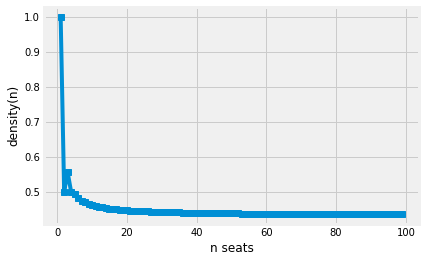

In [53]:
plot_density(range(1, 100))

There is something funny going on with the first few values of `n`. Let's separately look at the first few:

0.46203174603174607

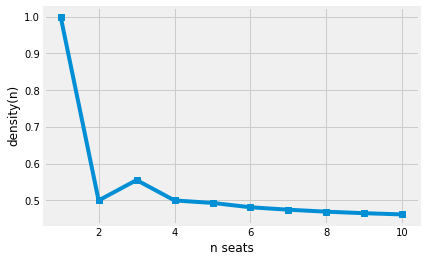

In [54]:
plot_density(range(1, 11))

And at a wider range:

0.43240754751464144

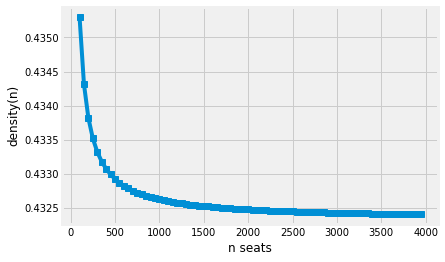

In [55]:
plot_density(range(100, 4000, 50))

0.4324066262174385

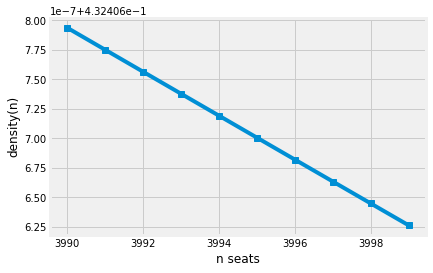

In [56]:
plot_density(range(3990, 4000))

The density is going down, and approaching a limit in monotonic manner. 

In [57]:
density(10000)

0.432362058089206

# Verification by Test

Peter's idea to check our code by running a test suite:

In [77]:
def test():
    assert expected(0) == 0
    assert expected(1) == expected(2) == 1
    assert expected(3) == 5/3
    assert density(3) == expected(3) / 3
    assert density(100) == expected(100) / 100
    assert lengths(3) == [(0, 1), (0, 0), (1, 0)]
    assert lengths(7) == [(0, 5), (0, 4), (1, 3), (2, 2), (3, 1), (4, 0), (5, 0)]
    for n in (3, 7, 10, 20, 100, 101, 200, 201):
        for repeat in range(500):
            assert_valid(simulate(n), n)         
    return 'ok'

def assert_valid(occupied, n):
    """Assert that, in this collection of occupied seats, no seat is adjacent to an
    occupied seat, and every unoccupied position is adjacent to an occupied seat."""
    occupied = set(occupied) # coerce to set
    for seat in range(n):
        if seat in occupied:
            assert not ((seat - 1) in occupied or (seat + 1) in occupied)
        else:
            assert      (seat - 1) in occupied or (seat + 1) in occupied

test()

'ok'

### lim <sub>n &rarr; &infin;</sub> density(n)

The problem statement asks us to determine the limit of `density(n)` as `n` goes to infinity. We have an idea from the plot and simulation that the answer is near 0.432. We now want to add some mathematics. The following is not a proof but a confirmation of the limit we found above but fitting a curve to the data.  

The insights come from Peter experimenting with ratios and differences. Our solution is slightly different from Peter's original.

#### Ratios

In [58]:
def ratio(n,m): return density(m)/density(n)

In [59]:
ratio(2000,1000)

1.0003433644176303

In [60]:
ratio(3000,2000)

1.0001144679072804

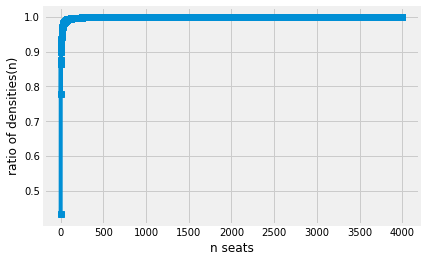

In [61]:
xs=range(1,4000)
lag = 1000
plt.xlabel('n seats'); plt.ylabel('ratio of densities(n)')
plt.plot(xs, [ratio(n,n+lag) for n in xs], 's-');

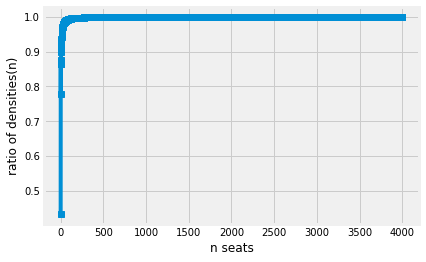

In [62]:
xs=range(1,4000)
lag = 2000
plt.xlabel('n seats'); plt.ylabel('ratio of densities(n)')
plt.plot(xs, [ratio(n,n+lag) for n in xs], 's-');

This looks like the ratio just approaches 1. Not much here other than it looks like it is converging.

#### Differences

In [63]:
def diff(n, m): return density(n) - density(m)

diff(10, 20)

0.014849533892798417

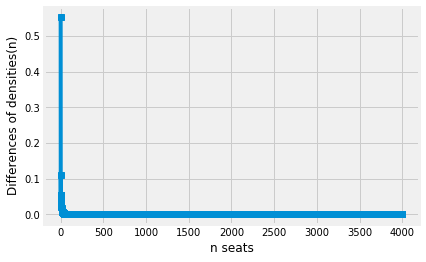

In [64]:
xs=range(1,4000)
lag = 20
plt.xlabel('n seats'); plt.ylabel('Differences of densities(n)')
plt.plot(xs, [diff(n,n+lag) for n in xs], 's-');

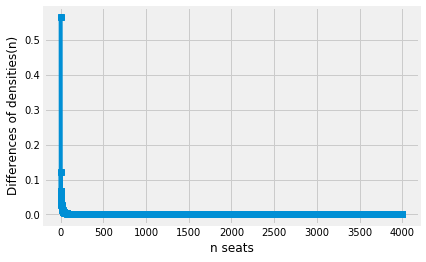

In [65]:
xs=range(1,4000)
lag = 200
plt.xlabel('n seats'); plt.ylabel('Differences of densities(n)')
plt.plot(xs, [diff(n,n+lag) for n in xs], 's-');

Again, nothing here. Unless we zoom in.

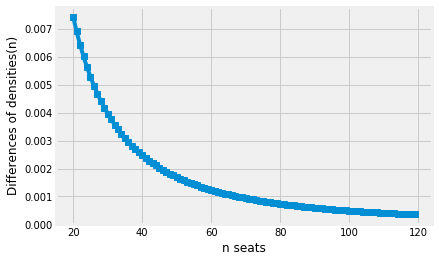

In [66]:
xs=range(20,120)
lag = 20
plt.xlabel('n seats'); plt.ylabel('Differences of densities(n)')
plt.plot(xs, [diff(n,n+lag) for n in xs], 's-');

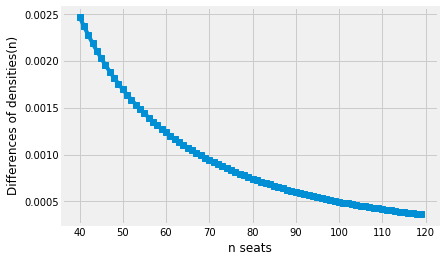

In [67]:
xs=range(40,120)
lag = 20
plt.xlabel('n seats'); plt.ylabel('Differences of densities(n)')
plt.plot(xs, [diff(n,n+lag) for n in xs], 's-');

This is not helping. This function looks similar to the original density function. Maybe we can go back to it and gain some insight.

#### Idea
The density function looks like it might follow a power function of the form $Y = b+ c*X^a$. Where $b$ is the long-term behavior of the density function, what we are looking for, $a$ is negative since the curve is decaying, and $c$ is a scale parameter. Let's see if we can fit a function to the data.

In [68]:
from scipy.optimize import curve_fit
import numpy as np

In [69]:
Xs = np.arange(100, 5001, 10)
Xs[:4]

array([100, 110, 120, 130])

In [70]:
def f(X,A,B,C): return B+C*(X**A)

((A,B,C), covariance) = curve_fit(f=f, xdata=Xs, ydata=[density(n) for n in Xs])

A,B,C

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

It is not converging, so we need to help the algorithmn.

#### Next Idea
Let's see if we can get an idea of the size of $A$. It would be nice if $A$ we an integer such as 1 or 2. Let's try those first and see what we find. 

In [78]:
def f(X,B,C): return B+C/X

((B,C), covariance) = curve_fit(f=f, xdata=Xs, ydata=[density(n) for n in Xs])

B,C,covariance

(0.43233235838169337,
 0.2969970751454783,
 array([[ 5.37463468e-34, -2.06500038e-31],
        [-2.06500038e-31,  2.55790193e-28]]))

In [79]:
def f(X,B,C): return B+C/X**2

((B,C), covariance) = curve_fit(f=f, xdata=Xs, ydata=[density(n) for n in Xs])

B,C,covariance

(0.43249193182450674,
 38.16556619468396,
 array([[ 4.24178017e-11, -1.13182668e-06],
        [-1.13182668e-06,  5.38659973e-01]]))

This looks promising, the function ${1 \over n}$ has a better fit than ${1 \over n^2}$ by looking at the variance of our estimates. But maybe it is not an integer. Let's do some algebra to confirm.  

Taking the difference remove $B$ from our problem. Taking the ratio will remove $C$. The problem is that I have to do this for 4 different values of $n$. So let's simplify by calling our first value $n$. Then the next value should be a multiple so we will simply double and get $2n$.  When we take the difference we get:

$$B+{C \over n} - B - {C \over 2n} = C \left( {1 \over n} - {1 \over 2n} \right)$$

For the second set of numbers, we start with $2n$ and go to $3n$ so we get

$$B+{C \over 2n} - B - {C \over 3n} = C \left( {1 \over 2n} - {1 \over 3n} \right)$$

Now the ratio, when we multiply numerator and denominator by $n$ is

$${1 - {1 \over 2} \over {1 \over 2} - {1 \over 3}} = 3$$

Now we will look at the data:

In [80]:
diff(100, 200)

0.0014849853757245013

And compared that to:

In [81]:
diff(200, 300)

0.0004949951252417595

And the ratio is:

In [82]:
diff(100, 200) / diff(200, 300)

2.99999999999843

Wow&mdash; that is close, let's check some other values:

In [83]:
n = 250; diff(n, 2*n) / diff(2*n, 3*n)

2.999999999992991

In [84]:
n = 500; diff(n, 2*n) / diff(2*n, 3*n)

2.999999999997757

It looks like we have our answer to the value of the power. Let's compare by writing a function.

We can plug them into a function that estimates the density:

In [85]:
def f(X,B,C): return B+C/X

((B,C), covariance) = curve_fit(f=f, xdata=Xs, ydata=[density(n) for n in Xs])

B,C

(0.43233235838169337, 0.2969970751454783)

In [86]:
def estimated_density(n): return B + C / n

And we can test how close this function is to the true `density` function:

In [87]:
max(abs(density(n) - estimated_density(n))
    for n in range(200, 4000))

1.4432899320127035e-15

That says that, for all values of `n` from 200 to 4,000, `density(n)` and `estimated_density(n)` agree at least through the first 15 decimal places!

We now have a plausible answer to the problem:

> lim<sub style="font-size:large"> <tt>n</tt>&rarr;&infin;</sub> <tt>density(n) &cong;  0.43233235838169365</tt>

# Why?

We feel good about our results but we still don't have a proof. At this point Peter, used google to gain more insights and this is what he found:

- Search: [`[0.4323323]`](https://www.google.com/search?q=0.4323323) Formula: `sinh(1) / exp(1)` [(Page)](http://arxiv.org/pdf/1310.4360.pdf)
- Search: [`[0.432332358]`](https://www.google.com/search?q=0.432332358) Formula: `0.5(1-e^(-2))` [(Page)](http://www.actuarialoutpost.com/actuarial_discussion_forum/archive/index.php/t-52095.html)

Looks like an answer:

In [88]:
from math import sinh, exp, e

S = sinh(1) / exp(1)
E = 0.5 * (1 - e ** (-2))

S, E, B

(0.43233235838169365, 0.43233235838169365, 0.43233235838169337)

We suspect that

> lim <sub>n &rarr; &infin;</sub> density(n) = (1 - e<sup>-2</sup>) / 2

but again this is no proof.

## Analytic Solution    

We will use generating functions to solve. Read section about [generating functions](https://en.wikipedia.org/wiki/Generating_function). 

Let's start with our recursion equation:

$$E_{n} = 1+ {2 \over n} \sum_{i=1}^{n-2}E_{i}$$. 

To make it easier for notation, let 
$$s_{n-2} = \sum_{i=1}^{n-2}E_{i}$$

Now we have our recursion equation which we will call (1):
$$E_{n} = 1+ {2 \over n} s_{n-2}$$

We also have, equation (2):

$$s_{n}= \sum_{i=1}^{n}E_{i}= E_{n} +\sum_{i=1}^{n-1}E_{i} = E_{n} + s_{n-1}$$

These are our two recursion equations. Now we introduce the generating functions.  

Let $$E(x)=\sum_{n=0}^{\infty}E_{n}x^n$$ and

$$S(x)=\sum_{n=0}^{\infty}s_{n}x^n$$  

Now let's look at some properties of the generating function, we will use $S(x)$ as our reference. 

$$S(x) = s_0 + s_1 x + s_2 x + ....$$
$$xS(x) = s_0 x+ s_1 x^2 + s_2 x^3 + ....$$
$$S'(x) = s_1  + s_2 x + s_2 x^2 ....$$  

We are going to multiple by $x^n$ and sum from $n=0$ to $n = \infty$ to get our generating functions.  We will define $E_{0}=0$. Thus the left had side of equation (1) is:
$$E(x)=\sum_{n=0}^{\infty}E_{n}x^n$$
On the right hand side of (1) we will handle the $1$ first. From the book we have:
$$\sum_{n=0}^{\infty}x^n = {1 \over (1-x)}$$

The last term on the right-hand side of (1) is tricky. First we will have to define a new function which is the expansion of the product:
$$G(x) = 2[{1 \over 2}s_0 x^2 + {1 \over 3}s_1 x^3 + ... + {1 \over m}s_m-2 x^m + ....]$$
Now taking the derivative with respect to $x$ yields:
$$G'(x)=2[s_0 x + s_1 x^2 + ... + s_m-2 x^{m-1} + ....]$$
But what is in the brackets is $xS(x)$, from above thus
$$G'(x) = 2xS(x)$$

Rewriting (1) as
$$E(x)={1 \over (1-x)} + G(x)$$

By similar reasoning for (2) we have:
$$S(x)=E(x)+xS(x)$$  or
$$E(x)=S(x)(1-x)$$
Now we are ready to solve.  Setting the two equations above equal to each other we have:
$$S(x)(1-x) = {1 \over (1-x)} + G(x)$$
Taking the derivative of each side with respect to $x$ yields:
$$S'(x)(1-x)-S(x)={1 \over (1-x)^2} + G'(x) = {1 \over (1-x)^2} +2xS(x)$$
or
$$S'(x)(1-x)-(1+2x)S(x)={1 \over (1-x)^2}$$
This is a first order variable coefficient linear inhomongenous differential equation. We will not solve this but the solution is
$$S(x)={(1-e^{-2x}) \over (1-x)^3}$$
Using the relation above we have the generating function:
$$E(x)={(1-e^{-2x}) \over (1-x)^2}$$  

To find any average occupancy, $E_n$, we would have to take the nth derivative of $E(X)$ and evaluate at 0. We don't want to use this formula to find the coefficeints, $E_n$ but the long-term behaviour. This is called the [asympotic growth](https://en.wikipedia.org/wiki/Generating_function) of the sequence $E_n$. Using the referenced Wikipedia site, we have
$$E_n \sim {B(r) \over r^\alpha \Gamma(\beta)} n^{\beta - 1}\left( {1 \over r} \right)^n$$
Since we have $ (1-x)^2$ in the denominator, $r=1$. We also have $B(x) = 1-e^{-2x}$, $\beta = 2$, and $\alpha = 0$. We also know that $\Gamma(n)=n!$. Thus we have
$$E_n \sim { 1-e^{-2 * 1}\over 1^0 \Gamma(2)} n^{1}\left( {1 \over 1} \right)^n = { 1-e^{-2}\over 2} n$$
Finally
$$\lim_{n\to\infty}{E_n \over n} = { 1-e^{-2}\over 2}$$ 

In [89]:
(1-np.exp(-2))/2

0.43233235838169365

# Compare Techniques

Let's compare the three techniques from simulation, to recursion, and curve fitting.

Let's run the simulation for if the simulation returns results that match the actual `density` function and the `estimated_density` function:

In [90]:
print('   n   simulate  density   estimated')
for n in (10, 25, 50, 100, 200, 400):
    print('{:4d}   {:.4f}    {:.4f}    {:.4f}'
          .format(n, simulated_density(n), density(n), estimated_density(n)))

   n   simulate  density   estimated
  10   0.4622    0.4620    0.4620
  25   0.4442    0.4442    0.4442
  50   0.4383    0.4383    0.4383
 100   0.4354    0.4353    0.4353
 200   0.4338    0.4338    0.4338
 400   0.4330    0.4331    0.4331


We get good agreement (at least to 3 decimal places), suggesting that either our three implementations are all correct, or we've made  mistakes in all three. 

# Conclusion

Using three different approaches we found:

> <tt>lim <sub>n &rarr; &infin;</sub> density(n) = (1 - e<sup>-2</sup>) / 2 &cong; 0.43233235838169365 </tt>